In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from __future__ import print_function, division
from scipy.signal import argrelextrema

# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Seperate the 2 variables N and t

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(1-\frac{N}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}}$

Substitution and Integration

$\int \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}} dN = \int r \times dt$

Separate Integration for each term 

$\int r \times dt = rt + C_1$

$\int \frac{1}{N} dN = \ln{N} + C_2$

For $\int \frac{\frac{1}{K}}{1 - \frac{N}{K}} dN$ 

Assume $u = 1 - \frac{N}{K}$ => $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N}{K}} + C_3$

$\ln{N} - \ln{1 - \frac{N}{K}} = \ln{\frac{N}{1-\frac{N}{K}}} = rt + C$

$\frac{N}{1-\frac{N}{K}} = e^{rt + C}$

$\frac{N}{1-\frac{N}{K}}= Ae^{rt}$

Obtain the equation in terms of N

$N = Ae^{rt} \times 1 - \frac{N}{K}$

$N = Ae^{rt} - Ae^{rt} \times \frac{N}{K}$

$N + Ae^{rt} \times \frac{N}{K} = Ae^{rt}$

$N\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

To obtain a value for A, let us consider an initial condition at time $t=0$

$Ae^0 = A$

$No = \frac{A}{1 + \frac{A}{K}}$

$No = \frac{AK}{K+A}$

$No(K+A) = AK$

$NoK + NoA = AK$

$NoA - AK = -NoK$

$AK -NoA = NoK$

$A = \frac{NoK}{K - No}$

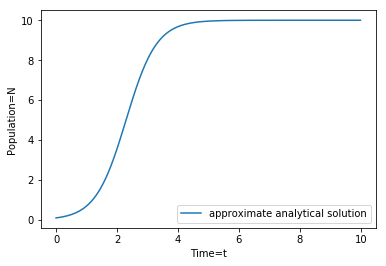

In [2]:
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (No*K)/(K-No)
N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximate analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Using scipy.integrate package function odeint

In [3]:
 def derivativeFunction(N, t, r, K):
    """Derivative functiion"""   
     # let's define the right-hand side of the differential equation
    # It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
    return r*N*(1-N/K)

In [6]:
def demo_odeint(time, No, r, K):
    #The order of the arguments for ode function: the derivative function, the initial condition, the points where we want the solution, and a list of parameters
    N = odeint(derivativeFunction, No, time, (r, K))
    # plot the solution
    plt.plot(time, N)
    plt.xlabel('Time') # define label of x-axis
    plt.ylabel('Population') # and of y-axis
    plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
    plt.show()


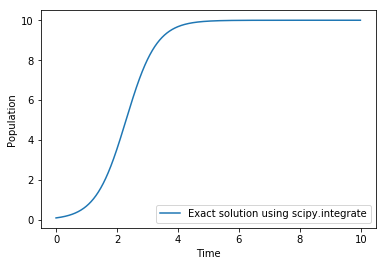

In [7]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)


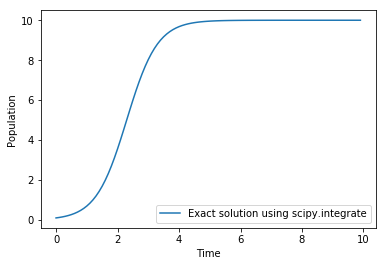

In [8]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.1
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)



Eulers method

In [9]:
# Logistic growth rate differential equation
def logisticGrowth(N,K,r):
    return r*N*(1-(N/K))

In [10]:
def demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue):
    stepSize = (end-start)/nsteps
    # Create arrays to hold values of t and N
    time = np.arange(start,end+stepSize,stepSize)
    narray = np.zeros((nsteps+1,))
    # set the initial values
    time[0], narray[0] = initialValue
    # Apply Euler's method
    for i in range(1,nsteps+1):
        narray[i] = narray[i-1] + stepSize*logisticGrowth(narray[i-1], carryingCapacity, growthRate)
    return time, narray

In [11]:
# Analytical solution
def analyticalSolution(t, No, r, K):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    return N


In [12]:
def plotComparisonEulersAnalytical(time, narray, N):
    plt.plot(time, narray, label='Euler')
    plt.plot(time, N, label='Analytical' )
    plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
    plt.xlabel('time') 
    plt.ylabel('solution')
    plt.legend(loc=4)
    plt.grid()
    plt.show()


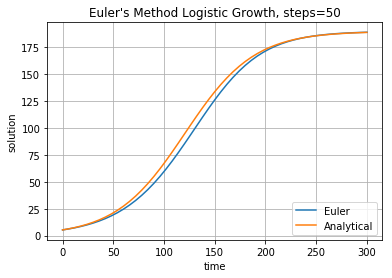

In [14]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

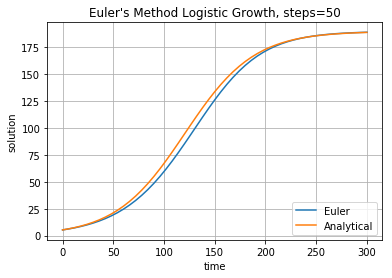

In [15]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

In [17]:
def Period(state,t):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [18]:

def getMeanPeriodandPeakInfo(array, t):
    """
    Calculate the mean period and return coordinates of peaks
    xlist will store the corresponding time points of peaks
    maxindices is indices in the array representing peaks
    """
    # Get the indices of the maxima
    maxindices = argrelextrema(array, np.greater)
    
    # List of all timepoints where maxindices are obtained
    xlist = []
    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
    
    # Get the differences between parwise time values
    # Represents local period
    differences = np.diff(xlist)
    
    # Peak differences
    peakdiff = np.diff(maxindices[0])
    
    # Quarter values
    m = len(t)-maxindices[0][-1]
    
    q0value = np.array([maxindices[0][0]]*3 * np.array([0.25,0.5,0.75]))
    q1value = maxindices[0][:-1] + peakdiff/4
    q2value = maxindices[0][:-1] + peakdiff/4*2
    q3value = maxindices[0][:-1] + peakdiff/4*3
    
    q1lastv = (maxindices[0][-1] + peakdiff[-1]*0.25).astype(int) if ((m//(peakdiff[-1]*0.25)!=0)) else 0
    q2lastv = (maxindices[0][-1] + peakdiff[-1]*0.5).astype(int)  if ((m//(peakdiff[-1]*0.5)!=0)) else 0
    q3lastv = (maxindices[0][-1] + peakdiff[-1]*0.75).astype(int)  if ((m//(peakdiff[-1]*0.75)!=0)) else 0
    
    allqpositions = np.concatenate((q0value.astype(int),q1value.astype(int),q2value.astype(int),q3value.astype(int),np.array([q1lastv]),np.array([q2lastv]),np.array([q3lastv])))
    
    q0value = array[q0value.astype(int)]
    q1value = array[q1value.astype(int)]
    q2value = array[q2value.astype(int)]
    q3value = array[q3value.astype(int)]
    
    q1lastpos = np.array([t[q1lastv]])
    q2lastpos = np.array([t[q2lastv]])
    q3lastpos = np.array([t[q3lastv]])
    
    q1lastv = np.array([array[q1lastv]])
    q2lastv = np.array([array[q2lastv]])
    q3lastv = np.array([array[q3lastv]])
    
    # Get the mean period
    meanP = np.average(differences)

    # Quarter time points
    q0 = np.array([xlist[0]]*3 * np.array([0.25,0.5,0.75])) # quarters before first peak
    q1 = xlist[:-1] + differences/4
    q2 = xlist[:-1] + differences*2/4
    q3 = xlist[:-1] + differences*3/4
    
    # Array values for quarters
    quartertimes = np.concatenate((q0,q1,q2,q3,q1lastpos,q2lastpos,q3lastpos))
    quartervalues = np.concatenate((q0value,q1value,q2value,q3value,q1lastv,q2lastv,q3lastv))
    
    return meanP, xlist, maxindices, quartertimes, quartervalues, allqpositions
    

### Part a

In [19]:
def periodWithVarying_kin(state,t, kin):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [20]:
def findPeriod(minkin, maxkin,stepsize,state0, timeGap):
    
    # Start and end time in hours
    starttime = 0.0
    endtime = 60
    t = np.arange(starttime, endtime, timeGap)
    
    results = []
    
    # Evaluate on all kin values with certain stepsize
    kinvalues = np.arange(minkin,maxkin,stepsize)
    
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Get results for M, Fc, and Fn
        currentkinresults = []
        for i in range(3):
            array = result_odeint[:,i]
            meanP,xlist,maxindices,quartertimes,quartervalues,allqpositions = getMeanPeriodandPeakInfo(array,t)
            currentkinresults.append((x, meanP, result_odeint, t,  xlist, array[maxindices], maxindices, quartertimes, quartervalues, allqpositions))
    results.append(currentkinresults)
    # Results is array of array
    # results[0] is results for first kin evaluated
    # results[0][0] is results for M for first kin
    # results[0][1] is results for Fc for first kin
    # results[0][2] is results for Fn for first kin
    #print(len(results))
    return results

In [21]:
def viewResultForPeriodsForProteinWithVarying_kin(results):
    # Based on Fc
    kin = results[1][0]
    period = results[1][1]
    result_odeint = results[1][2]
    time = results[1][3]
    peaksF = results[1][5]
    peaksM = results[0][2][:,0][results[1][6]]

    # Plot M(t) vs Fc(t)
    # With quarters (evening, midnight, morning, and noon)
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0], c = 'blue')
    # Plot the quarter points
    plt.plot(results[1][8],results[0][2][:,0][results[1][9]], '.', c = 'orange')
    # Plot the eves based on Fc
    plt.plot(peaksF,peaksM, '.', c = 'black')
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()
    
    # Plot all M, Fc, and Fn over time
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'blue', time, result_odeint[:,1], 'green', time, result_odeint[:,2], 'red')
    # Plot M quarter points - index is 0
    plt.plot(results[0][4],results[0][5], '.', c= 'black')
    plt.plot(results[0][7],results[0][8], '.', c= 'orange')
    # Plot Fc quarter points - index is 1
    plt.plot(results[1][4],results[1][5], '.', c= 'black')
    plt.plot(results[1][7],results[1][8], '.', c= 'orange')
    # Plot Fn quarter points - index is 2
    plt.plot(results[2][4],results[2][5], '.', c= 'black')
    plt.plot(results[2][7],results[2][8], '.', c= 'orange')
    plt.show()

In [22]:
minkin = 0.01
maxkin = 0.1
stepsize = .01
state0 = [0, 0, 0]
timeGap = 0.001

In [25]:
results = findPeriod(minkin, maxkin,stepsize,state0, timeGap)

In [26]:
viewResultForPeriodsForProteinWithVarying_kin(results)

IndexError: list index out of range